In [1]:
%matplotlib inline
%run ../../import_envs.py
print('probtorch:', probtorch.__version__, 
      'torch:', torch.__version__, 
      'cuda:', torch.cuda.is_available())

probtorch: 0.0+5a2c637 torch: 1.1.0 cuda: True


In [2]:
%run PARAMETERS.py
NAME = 'APG'
MCMC_STEPS = 5
CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda:1')

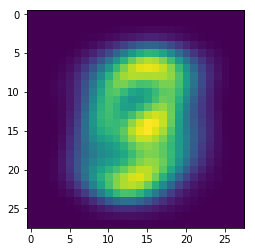

In [5]:
import matplotlib.pyplot as plt
mnist_mean = np.load('../mnist_mean.npy')
plt.imshow(mnist_mean)

In [4]:
from model_operations import Init_models, Save_models
from crop import *

models, optimizer = Init_models(K=K,
                                D=D,
                                FRAME_PIXELS=FRAME_PIXELS, 
                                DIGIT_PIXELS=DIGIT_PIXELS, 
                                HIDDEN_LIST=HIDDEN_LIST, 
                                Sigma0=Sigma0,
                                CUDA=CUDA, 
                                device=DEVICE, 
                                lr=LEARNING_RATE, 
                                RESTORE=False, 
                                PATH=PATH)
crop = Crop(digit_size=28, 
            frame_size=64, 
            CUDA=CUDA, 
            device=DEVICE)

In [ ]:
from apg import APG
train(models=models, 
      objective=APG, 
      optimizer=optimizer, 
      data_path=data_path, 
      mcmc_steps=MCMC_STEPS,
      mnist_mean=mnist_mean,
      crop=crop,
      Train_Params=Train_Params,
      CUDA=CUDA,
      device=DEVICE,
      path=PATH)

In [ ]:
Save_models(models, PATH=PATH)